#**Introduction to pandas**
by Maxwell Margenot

Part of the Quantopian Lecture Series:

+ www.quantopian.com/lectures
+ github.com/quantopian/research_public

pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the Series and DataFrame objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the lecture series, allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas DataFrame, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

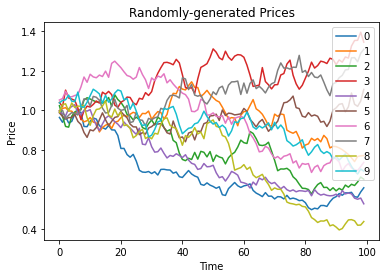

In [112]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

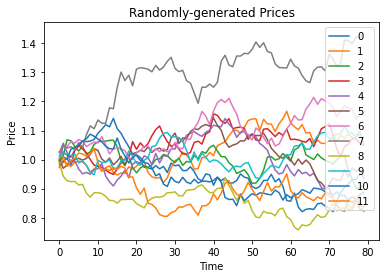

In [113]:
#miejemplo
returns = pd.DataFrame(np.random.normal(1.0, 0.02, (80, 12)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

#**pandas Data Structures**
##**Series**
A pandas Series is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a Series is as easy as calling pandas.Series() on a Python list or NumPy array.

In [114]:
s = pd.Series([1, 2, np.nan, 4, 5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


In [115]:
#miejemplo
r = pd.Series([[1, 2, 3, 4, 5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20]])
print(r)

0         [1, 2, 3, 4, 5]
1        [6, 7, 8, 9, 10]
2    [11, 12, 13, 14, 15]
3    [16, 17, 18, 19, 20]
dtype: object


Every Series has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [116]:
print(s.name)

None


In [117]:
#miejemplo
print(r.name)

None



This name can be directly modified with no repercussions.

In [118]:
s.name = "Toy Series"
print(s.name)

Toy Series


In [119]:
#miejemplo
r.name = "matriz series"
print(r.name)

matriz series


We call the collected axis labels of a Series its index. An index can either passed to a Series as a parameter or added later, similarly to its name. In the absence of an index, a Series will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [120]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


In [121]:
#miejempo
print(r.index)

RangeIndex(start=0, stop=4, step=1)


pandas has a built-in function specifically for creating date indices, date_range(). We use the function here to create a new index for s.

In [122]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
#miejmplo
new_index2 = pd.date_range("2018-01-01", periods = len(r), freq="M")
print(new_index2)

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30'], dtype='datetime64[ns]', freq='M')


An index must be exactly the same length as the Series itself. Each index must match one-to-one with each element of the Series. Once this is satisfied, we can directly modify the Series index, as with the name, to use our new and more informative index (relatively speaking).

In [ ]:
s.index = new_index
print(s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
#miejmplo
r.index =  new_index2
print(r.index)

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30'], dtype='datetime64[ns]', freq='M')


The index of the Series is crucial for handling time series, which we will get into a little later.

###**Accessing Series Elements**
Series are typically accessed using the iloc[] and loc[] methods. We use iloc[] to access elements by integer index and we use loc[] to access the index of the Series.

In [ ]:
print("First element of the series: ", s.iloc[0])
print("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


In [ ]:
#miejemplo
print("First elements of the series: ", r.iloc[0])
print("Last elements of the series: ", r.iloc[len(r)-1])

First elements of the series:  [1, 2, 3, 4, 5]
Last elements of the series:  [16, 17, 18, 19, 20]


We can slice a Series similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [ ]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

In [ ]:
r.iloc[:1]

2018-01-31    [1, 2, 3, 4, 5]
Freq: M, Name: matriz series, dtype: object

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size step until it passes the end index, not including the end.

In [ ]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

In [ ]:
#miejemplo
r.iloc[0:len(r):2]

2018-01-31         [1, 2, 3, 4, 5]
2018-03-31    [11, 12, 13, 14, 15]
Freq: 2M, Name: matriz series, dtype: object


We can even reverse a Series by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [ ]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

In [ ]:
#miejemplo
r.iloc[::-1]

2018-04-30    [16, 17, 18, 19, 20]
2018-03-31    [11, 12, 13, 14, 15]
2018-02-28        [6, 7, 8, 9, 10]
2018-01-31         [1, 2, 3, 4, 5]
Freq: -1M, Name: matriz series, dtype: object


This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [ ]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

In [ ]:
#miejemplo
r.iloc[-1:-3:-1]

2018-04-30    [16, 17, 18, 19, 20]
2018-03-31    [11, 12, 13, 14, 15]
Freq: -1M, Name: matriz series, dtype: object

We can also access a series by using the values of its index. Since we indexed s with a collection of dates (Timestamp objects) we can look at the value contained in s for a particular date.

In [ ]:
s.loc['2016-01-01']

1.0

In [ ]:
#miejemplo
r.loc['2018-01-31']

[1, 2, 3, 4, 5]


Or even for a range of dates!

In [ ]:
s.loc['2016-01-02':'2016-01-04']

In [ ]:
#miejemplo
r.loc['2018-01-31':'2018-03-31']

2018-01-31         [1, 2, 3, 4, 5]
2018-02-28        [6, 7, 8, 9, 10]
2018-03-31    [11, 12, 13, 14, 15]
Freq: M, Name: matriz series, dtype: object

With Series, we can just use the brackets ([]) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access Series (and DataFrames) using both index and integer values and the results will change based on context (especially with DataFrames).

###**Boolean Indexing**
In addition to the above-mentioned access methods, you can filter Series using boolean arrays. Series are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another Series, this time filled with boolean values.

In [ ]:
print(s < 3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


In [ ]:
#miejemplo
r2 = pd.Series([8,9,10,11,12,13])
print(r2 < 10)

0     True
1     True
2    False
3    False
4    False
5    False
dtype: bool


We can pass this Series back into the original Series to filter out only the elements for which our condition is True.

In [ ]:
print(s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


In [ ]:
#miejemplo
print(r2.loc[r2<10])

0    8
1    9
dtype: int64



If we so desire, we can group multiple conditions together using the logical operators &, |, and ~ (and, or, and not, respectively).

In [ ]:
print(s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


In [ ]:
#miejemplo
print(r2.loc[(r2>8) & (r2<13)])

1     9
2    10
3    11
4    12
dtype: int64


###**Indexing and Time Series**
Since we use Series for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas Timestamp objects. Let's pull a full time series, complete with all the appropriate labels, by using our get_pricing() method. All data pulled with get_pricing() or using our Pipeline API will be in either Series or DataFrame format. We can modify this index however we like.

In [ ]:
import pandas_datareader as pdr
import datetime 

In [132]:
symbol = 'CMG'
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2019,1,1)
data = pdr.get_data_yahoo(symbol, start, end)

In [126]:
#miejemplo
symbol2 = 'AMD'
start2 = datetime.datetime(2018,1,1)
end2 = datetime.datetime(2019,1,1)
data2 = pdr.get_data_yahoo(symbol2, start2, end2)


We can display the first few elements of our series by using the head() method and specifying the number of elements that we want. The analogous method for the last few elements is tail().

In [133]:
prices = data['Open']
print("\n", type(prices))
prices.head(5)


 <class 'pandas.core.series.Series'>


Date
2018-01-02    290.899994
2018-01-03    294.000000
2018-01-04    309.029999
2018-01-05    310.239990
2018-01-08    314.100006
Name: Open, dtype: float64

In [127]:
#miejemplo
prices2 = data2['Open']
print("\n", type(prices2))
prices2.head(8)


 <class 'pandas.core.series.Series'>


Date
2018-01-02    10.42
2018-01-03    11.61
2018-01-04    12.10
2018-01-05    12.19
2018-01-08    12.01
2018-01-09    12.00
2018-01-10    11.63
2018-01-11    12.07
Name: Open, dtype: float64

As with our toy example, we can specify a name for our time series, if only to clarify the name the get_pricing() provides us.

In [134]:
print('Old name: ', prices.name)
prices.name = symbol
print('New name: ', prices.name)

Old name:  Open
New name:  CMG


In [131]:
#miejemplo
print('Old name: ', prices2.name)
prices2.name = symbol2
print('New name: ', prices2.name)

Old name:  Open
New name:  AMD


Let's take a closer look at the DatetimeIndex of our prices time series.)

In [135]:
print(prices.index)

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)


In [136]:
#miejemplo
print(prices2.index)

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)


Notice that this DatetimeIndex has a collection of associated information. In particular it has an associated frequency (freq) and an associated timezone (tz). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our Series, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because get_pricing() pulls only data from market days. Let's up-sample from this daily data to monthly data using the resample() method.

In [137]:
monthly_prices = prices.resample('M').mean()
monthly_prices.head(10)

Date
2018-01-31    322.847618
2018-02-28    296.441053
2018-03-31    322.315241
2018-04-30    338.480476
2018-05-31    428.954999
2018-06-30    455.313808
2018-07-31    453.071431
2018-08-31    490.896955
2018-09-30    480.848418
2018-10-31    438.575654
Freq: M, Name: CMG, dtype: float64

In [138]:
#miejemplo
monthly_prices2 = prices2.resample('M').mean()
monthly_prices2.head(8)

Date
2018-01-31    12.283809
2018-02-28    12.045263
2018-03-31    11.364762
2018-04-30    10.124762
2018-05-31    12.325455
2018-06-30    15.605238
2018-07-31    16.711905
2018-08-31    20.830870
Freq: M, Name: AMD, dtype: float64

The resample() method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the how parameter.

In [139]:
monthly_prices_med = prices.resample('M').median()
monthly_prices_med.head(10)

Date
2018-01-31    327.000000
2018-02-28    304.470001
2018-03-31    321.000000
2018-04-30    328.399994
2018-05-31    428.915009
2018-06-30    459.019989
2018-07-31    453.000000
2018-08-31    488.429993
2018-09-30    480.480011
2018-10-31    436.059998
Freq: M, Name: CMG, dtype: float64

In [140]:
#miejemplo
monthly_prices_med2 = prices2.resample('M').median()
monthly_prices_med2.head(8)

Date
2018-01-31    12.180000
2018-02-28    11.950000
2018-03-31    11.490000
2018-04-30    10.050000
2018-05-31    12.410000
2018-06-30    15.650000
2018-07-31    16.590000
2018-08-31    19.860001
Freq: M, Name: AMD, dtype: float64

We can even specify how we want the calculation of the new period to be done. Here we create a custom_resampler() function that will return the first value of the period. In our specific case, this will return a Series where the monthly value is the first value of that month.

In [141]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M').apply(custom_resampler)
first_of_month_prices.head(10)

Date
2018-01-31    290.899994
2018-02-28    314.059998
2018-03-31    318.260010
2018-04-30    322.239990
2018-05-31    423.290009
2018-06-30    431.589996
2018-07-31    427.980011
2018-08-31    435.000000
2018-09-30    476.190002
2018-10-31    446.970001
Freq: M, Name: CMG, dtype: float64

In [142]:
#miejemplo
first_of_month_prices2 = prices2.resample('M').apply(custom_resampler)
first_of_month_prices2.head(10)

Date
2018-01-31    10.420000
2018-02-28    13.620000
2018-03-31    12.260000
2018-04-30     9.990000
2018-05-31    10.830000
2018-06-30    13.980000
2018-07-31    14.800000
2018-08-31    18.340000
2018-09-30    25.620001
2018-10-31    30.690001
Freq: M, Name: AMD, dtype: float64


We can also adjust the timezone of a Series to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the tz_convert() method, since the time is already localized.

In [145]:
eastern_prices = prices.tz_localize('US/Eastern')
eastern_prices.head(10)

Date
2018-01-02 00:00:00-05:00    290.899994
2018-01-03 00:00:00-05:00    294.000000
2018-01-04 00:00:00-05:00    309.029999
2018-01-05 00:00:00-05:00    310.239990
2018-01-08 00:00:00-05:00    314.100006
2018-01-09 00:00:00-05:00    319.670013
2018-01-10 00:00:00-05:00    318.940002
2018-01-11 00:00:00-05:00    322.609985
2018-01-12 00:00:00-05:00    326.839996
2018-01-16 00:00:00-05:00    329.329987
Name: CMG, dtype: float64

In [147]:
#miejemplo
eastern_prices = prices.tz_localize('US/Eastern')
eastern_prices.head(8)

Date
2018-01-02 00:00:00-05:00    290.899994
2018-01-03 00:00:00-05:00    294.000000
2018-01-04 00:00:00-05:00    309.029999
2018-01-05 00:00:00-05:00    310.239990
2018-01-08 00:00:00-05:00    314.100006
2018-01-09 00:00:00-05:00    319.670013
2018-01-10 00:00:00-05:00    318.940002
2018-01-11 00:00:00-05:00    322.609985
Name: CMG, dtype: float64

In addition to the capacity for timezone and frequency management, each time series has a built-in reindex() method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically np.nan, though we can provide a fill method.

The data that we get_pricing() only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities. First let's create a new DatetimeIndex that contains all that we want.

In [156]:
calendar_dates = pd.date_range(start=start, end=end, freq='D')
print(calendar_dates)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')


In [158]:
#miejemplo
calendar_dates2 = pd.date_range(start2, end2, freq='D')
print(calendar_dates2)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')


Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is ffill. This denotes "forward fill". Any NaN values will be filled by the last value listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [159]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2018-01-01           NaN
2018-01-02    290.899994
2018-01-03    294.000000
2018-01-04    309.029999
2018-01-05    310.239990
2018-01-06    310.239990
2018-01-07    310.239990
2018-01-08    314.100006
2018-01-09    319.670013
2018-01-10    318.940002
2018-01-11    322.609985
2018-01-12    326.839996
2018-01-13    326.839996
2018-01-14    326.839996
2018-01-15    326.839996
Freq: D, Name: CMG, dtype: float64

In [160]:
calendar_prices2 = prices2.reindex(calendar_dates2, method='ffill')
calendar_prices2.head(10)

2018-01-01      NaN
2018-01-02    10.42
2018-01-03    11.61
2018-01-04    12.10
2018-01-05    12.19
2018-01-06    12.19
2018-01-07    12.19
2018-01-08    12.01
2018-01-09    12.00
2018-01-10    11.63
Freq: D, Name: AMD, dtype: float64

You'll notice that we still have a couple of NaN values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these NaN values in the next section, when we deal with missing data.

###**Missing Data**
Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create NaN values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with fillna(). For example, say that we want to fill in the missing days with the mean price of all days.

In [161]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2018-01-01    413.358329
2018-01-02    290.899994
2018-01-03    294.000000
2018-01-04    309.029999
2018-01-05    310.239990
2018-01-06    310.239990
2018-01-07    310.239990
2018-01-08    314.100006
2018-01-09    319.670013
2018-01-10    318.940002
Freq: D, Name: CMG, dtype: float64

In [162]:
#miejemplo
meanfilled_prices2 = calendar_prices2.fillna(calendar_prices2.mean())
meanfilled_prices2.head(10)

2018-01-01    17.18074
2018-01-02    10.42000
2018-01-03    11.61000
2018-01-04    12.10000
2018-01-05    12.19000
2018-01-06    12.19000
2018-01-07    12.19000
2018-01-08    12.01000
2018-01-09    12.00000
2018-01-10    11.63000
Freq: D, Name: AMD, dtype: float64

Using fillna() is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the lecture on stationarity in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the method parameter, similarly to how the reindex() method works. We could use "backward fill", where NaNs are filled with the next filled value (instead of forward fill's last filled value) like so:

In [163]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2018-01-01    290.899994
2018-01-02    290.899994
2018-01-03    294.000000
2018-01-04    309.029999
2018-01-05    310.239990
2018-01-06    310.239990
2018-01-07    310.239990
2018-01-08    314.100006
2018-01-09    319.670013
2018-01-10    318.940002
Freq: D, Name: CMG, dtype: float64

In [164]:
#miejemplo
bfilled_prices2 = calendar_prices2.fillna(method='bfill')
bfilled_prices2.head(10)

2018-01-01    10.42
2018-01-02    10.42
2018-01-03    11.61
2018-01-04    12.10
2018-01-05    12.19
2018-01-06    12.19
2018-01-07    12.19
2018-01-08    12.01
2018-01-09    12.00
2018-01-10    11.63
Freq: D, Name: AMD, dtype: float64

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account future data that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the dropna() method. This is much better alternative than filling NaN values in with arbitrary numbers.

In [165]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2018-01-02    290.899994
2018-01-03    294.000000
2018-01-04    309.029999
2018-01-05    310.239990
2018-01-06    310.239990
2018-01-07    310.239990
2018-01-08    314.100006
2018-01-09    319.670013
2018-01-10    318.940002
2018-01-11    322.609985
Freq: D, Name: CMG, dtype: float64

In [167]:
#miejemplo
dropped_prices2 = calendar_prices2.dropna()
dropped_prices2.head(8)

2018-01-02    10.42
2018-01-03    11.61
2018-01-04    12.10
2018-01-05    12.19
2018-01-06    12.19
2018-01-07    12.19
2018-01-08    12.01
2018-01-09    12.00
Freq: D, Name: AMD, dtype: float64

Now our time series is cleaned for the calendar year, with all of our NaN values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

###**Time Series Analysis with pandas**
Let's do some basic time series analysis on our original prices. Each pandas Series has a built-in plotting method.

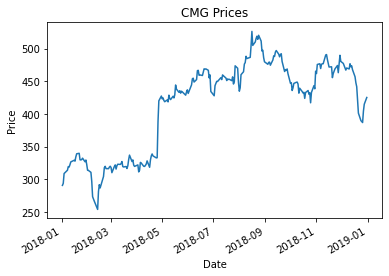

In [168]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

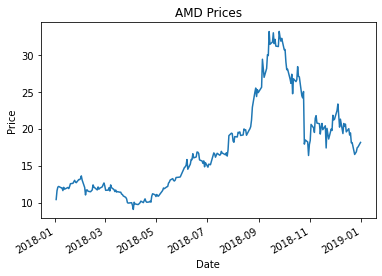

In [169]:
#miejemplo
prices2.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol2 + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the describe() method.

In [170]:
print("Mean: ", prices.mean())
print("Standard deviation: ", prices.std())

Mean:  413.27011983803067
Standard deviation:  69.69642561604951


In [171]:
print("Mean: ", prices2.mean())
print("Standard deviation: ", prices2.std())

Mean:  17.209681290554336
Standard deviation:  6.202684237789226


In [172]:
print("Summary Statistics")
print(prices.describe())

Summary Statistics
count    251.000000
mean     413.270120
std       69.696426
min      254.130005
25%      329.910004
50%      437.079987
75%      468.345001
max      526.510010
Name: CMG, dtype: float64


In [173]:
#miejemplo
print("Summary Statistics")
print(prices2.describe())

Summary Statistics
count    251.000000
mean      17.209681
std        6.202684
min        9.080000
25%       12.005000
50%       16.180000
75%       20.150001
max       33.180000
Name: AMD, dtype: float64



We can easily modify Series with scalars using our basic mathematical operators.

In [174]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

Date
2018-01-02    571.799988
2018-01-03    578.000000
2018-01-04    608.059998
2018-01-05    610.479980
2018-01-08    618.200012
Name: CMG, dtype: float64

In [175]:
#miejemplo
modified_prices2 = prices2 * 2 - 10
modified_prices2.head(5)

Date
2018-01-02    10.840000
2018-01-03    13.219999
2018-01-04    14.200001
2018-01-05    14.379999
2018-01-08    14.020000
Name: AMD, dtype: float64

And we can create linear combinations of Series themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new Series.

In [176]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

Date
2018-01-02    315.686594
2018-01-03    301.707569
2018-01-04    374.882331
2018-01-05    387.643027
2018-01-08    336.228862
dtype: float64

In [178]:
#miejemplo
noisy_prices2 = prices2 + 3 * pd.Series(np.random.normal(0, 5, len(prices2)), index=prices2.index) + 3
noisy_prices2.head(5)

Date
2018-01-02    -2.223782
2018-01-03     2.450551
2018-01-04    25.353375
2018-01-05    21.155687
2018-01-08     1.493918
dtype: float64

If there are no matching indices, however, we may get an empty Series in return.

In [179]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2018-01-02 00:00:00   NaN
2018-01-03 00:00:00   NaN
2018-01-04 00:00:00   NaN
2018-01-05 00:00:00   NaN
2018-01-08 00:00:00   NaN
dtype: float64

In [180]:
#miejemplo

empty_series2 = prices2 + pd.Series(np.random.normal(0, 1, len(prices2)))
empty_series2.head(5)

2018-01-02 00:00:00   NaN
2018-01-03 00:00:00   NaN
2018-01-04 00:00:00   NaN
2018-01-05 00:00:00   NaN
2018-01-08 00:00:00   NaN
dtype: float64

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [181]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

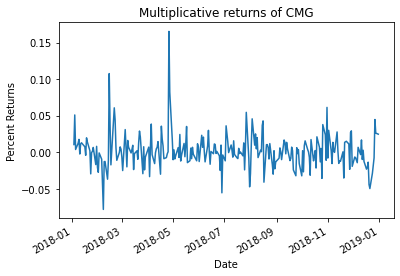

In [182]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

In [183]:
#miejemplo
add_returns2 = prices2.diff()[1:]
mult_returns2 = prices2.pct_change()[1:]

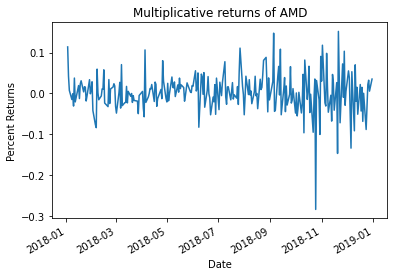

In [185]:
#miejemplo
plt.title("Multiplicative returns of " + symbol2)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns2.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [187]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.name = "30-day rolling mean"

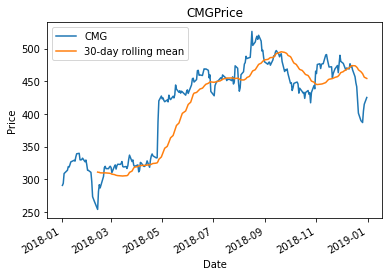

In [188]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [189]:
#miejemplo
rolling_mean2 = prices2.rolling(30).mean()
rolling_mean2.name = "30-day rolling mean"

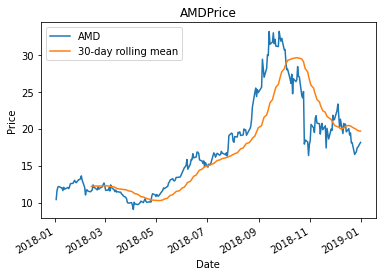

In [190]:
#miejemplo
prices2.plot()
rolling_mean2.plot()
plt.title(symbol2 + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [192]:
rolling_std = prices.rolling(30).std()
rolling_std.name = "30-day rolling volatility"

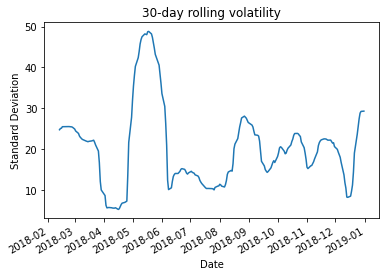

In [193]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

In [195]:
#miejemplo
rolling_std2 = prices2.rolling(30).std()
rolling_std2.name = "30-day rolling volatility"

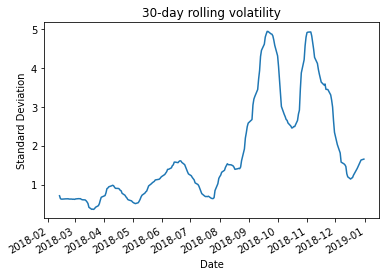

In [196]:
rolling_std2.plot()
plt.title(rolling_std2.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on Series the same way that they work on 1-dimensional NumPy arrays.

In [197]:
print(np.median(mult_returns))

0.0012391249966752227


In [198]:
#miejemplo
print(np.median(mult_returns2))

0.0036990914432192268


The majority of these functions, however, are already implemented directly as Series and DataFrame methods.

In [199]:
print(mult_returns.median())

0.0012391249966752227


In [200]:
#miejemplo
print(mult_returns2.median())

0.0036990914432192268


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the Series documentation before resorting to other calculations of common functions.

#**DataFrames**
Many of the aspects of working with Series carry over into DataFrames. pandas DataFrames allow us to easily manage our data with their intuitive structure.

Like Series, DataFrames can hold multiple types of data, but DataFrames are 2-dimensional objects, unlike Series. Each DataFrame has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a Series, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the pandas documentation on advanced indexing. The columns attribute is what provides the second dimension of our DataFrames, allowing us to combine named columns (all Series), into a cohesive object with the index lined-up.

We can create a DataFrame by calling pandas.DataFrame() on a dictionary or NumPy ndarray. We can also concatenate a group of pandas Series into a DataFrame using pandas.concat().

In [202]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print(dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([-2.64548693, -1.57911793, -0.79244387, -0.46152904, -0.88871751])}


In [211]:
#miejemplo
dict_data2 = {
    'primero' : [11,12,13,14,15],
    'segundo' : ['s','t','r','i','n'],
    'tercero' : np.random.normal(0, 1, 5)
}
print(dict_data2)

{'primero': [11, 12, 13, 14, 15], 'segundo': ['s', 't', 'r', 'i', 'n'], 'tercero': array([-0.12244139, -1.33378297, -1.5068443 , -1.47259463,  0.12815322])}



Each DataFrame has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of Timestamp objects like we did with Series.

In [205]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print(frame_data)

            a  b         c
2016-01-01  1  L -2.645487
2016-01-02  2  K -1.579118
2016-01-03  3  J -0.792444
2016-01-04  4  M -0.461529
2016-01-05  5  Z -0.888718


In [212]:
#miejemplo
frame_data2 = pd.DataFrame(dict_data2, index=pd.date_range('2016-01-01', periods=5))
print(frame_data2)

            primero segundo   tercero
2016-01-01       11       s -0.122441
2016-01-02       12       t -1.333783
2016-01-03       13       r -1.506844
2016-01-04       14       i -1.472595
2016-01-05       15       n  0.128153


As mentioned above, we can combine Series into DataFrames. Concatatenating Series like this will match elements up based on their corresponding index. As the following Series do not have an index assigned, they each default to an integer index.

In [213]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print(numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


In [214]:
#miejemplo
s_12 = pd.Series([1,2,3,4,5,6], name='unoAseis')
s_22 = pd.Series([7,8,9,10,11,12], name="sieteAdoce")
numbers2 = pd.concat([s_12, s_22], axis=1)
print(numbers2)

   unoAseis  sieteAdoce
0         1           7
1         2           8
2         3           9
3         4          10
4         5          11
5         6          12


We will use pandas.concat() again later to combine multiple DataFrames into one.

Each DataFrame also has a columns attribute. These can either be assigned when we call pandas.DataFrame or they can be modified directly like the index. Note that when we concatenated the two Series above, the column names were the names of those Series.

In [215]:
print(numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


In [216]:
print(numbers2.columns)

Index(['unoAseis', 'sieteAdoce'], dtype='object')


To modify the columns after object creation, we need only do the following:

In [217]:
numbers.columns = ['Shmevens', 'Shmodds']
print(numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


In [218]:
#miejemplo
numbers2.columns = ['1a6', '7a12']
print(numbers2)

   1a6  7a12
0    1     7
1    2     8
2    3     9
3    4    10
4    5    11
5    6    12


In the same vein, the index of a DataFrame can be changed after the fact.

In [219]:
print(numbers.index)

RangeIndex(start=0, stop=5, step=1)


In [220]:
#miejemplo
print(numbers2.index)

RangeIndex(start=0, stop=6, step=1)


In [221]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print(numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


In [222]:
#miejemplo
numbers2.index = pd.date_range("2018-06-01", periods=len(numbers2))
print(numbers2)

            1a6  7a12
2018-06-01    1     7
2018-06-02    2     8
2018-06-03    3     9
2018-06-04    4    10
2018-06-05    5    11
2018-06-06    6    12


Separate from the columns and index of a DataFrame, we can also directly access the values they contain by looking at the values attribute.

In [223]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

In [224]:
#miejemplo
numbers2.values

array([[ 1,  7],
       [ 2,  8],
       [ 3,  9],
       [ 4, 10],
       [ 5, 11],
       [ 6, 12]])


This returns a NumPy array.

In [225]:
type(numbers.values)

numpy.ndarray

In [226]:
#miejemplo
type(numbers2.values)

numpy.ndarray

##**Accessing DataFrame elements**
Again we see a lot of carryover from Series in how we access the elements of DataFrames. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a DataFrame, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [233]:
symbol = ["CMG", "MCD", "SHAK", "WFMIX"]
data = pdr.get_data_yahoo(symbol, start = datetime.datetime(2012,1,1), end = datetime.datetime(2016,1,1))
prices = data['Open']
if isinstance(symbol, list):
    prices.columns = map(lambda x: x, prices.columns)
else:
    prices.name = symbol

In [234]:
#miejemplo
symbol2 = ["AMD", "MSFT", "AAPL", "KO"]
data2 = pdr.get_data_yahoo(symbol2, start = datetime.datetime(2012,1,1), end = datetime.datetime(2016,1,1))
prices2 = data2['Open']
if isinstance(symbol2, list):
    prices2.columns = map(lambda x: x, prices2.columns)
else:
    prices2.name = symbol2

Here we directly access the CMG column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [235]:
prices.CMG.head()

Date
2012-01-03    343.700012
2012-01-04    346.000000
2012-01-05    346.880005
2012-01-06    348.880005
2012-01-09    349.000000
Name: CMG, dtype: float64

In [236]:
#miejemplo
prices2.AMD.head()

Date
2012-01-03    5.53
2012-01-04    5.47
2012-01-05    5.45
2012-01-06    5.44
2012-01-09    5.42
Name: AMD, dtype: float64


We can also use loc[] to access an individual column like so.

In [237]:
prices.loc[:, 'CMG'].head()

Date
2012-01-03    343.700012
2012-01-04    346.000000
2012-01-05    346.880005
2012-01-06    348.880005
2012-01-09    349.000000
Name: CMG, dtype: float64

In [238]:
#miejemplo
prices2.loc[:, 'AMD'].head()

Date
2012-01-03    5.53
2012-01-04    5.47
2012-01-05    5.45
2012-01-06    5.44
2012-01-09    5.42
Name: AMD, dtype: float64


Accessing an individual column will return a Series, regardless of how we get it.

In [239]:
print(type(prices.CMG))
print(type(prices.loc[:, 'CMG']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [241]:
#miejemplo
print(type(prices2.AMD))
print(type(prices2.loc[:, 'AMD']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Notice how we pass a tuple into the loc[] method? This is a key difference between accessing a Series and accessing a DataFrame, grounded in the fact that a DataFrame has multiple dimensions. When you pass a 2-dimensional tuple into a DataFrame, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the DataFrame to return every single row of the column with label 'CMG'. Lists of columns are also supported.

In [242]:
prices.loc[:, ['CMG', 'MCD']].head()

,CMG,MCD
Date,,
2012-01-03,343.700012,101.330002
2012-01-04,346.000000,99.110001
2012-01-05,346.880005,99.470001
2012-01-06,348.880005,100.089996
2012-01-09,349.000000,100.879997


In [245]:
#miejemplo
prices2.loc[:, ['AMD', 'KO']].head()

,AMD,KO
Date,,
2012-01-03,5.53,35.075001
2012-01-04,5.47,34.955002
2012-01-05,5.45,34.880001
2012-01-06,5.44,34.735001
2012-01-09,5.42,34.500000



We can also simply access the DataFrame by index value using loc[], as with Series.

In [246]:
prices.loc['2015-12-15':'2015-12-22']

,CMG,MCD,SHAK,WFMIX
Date,,,,
2015-12-15,560.130005,117.500000,40.700001,30.23
2015-12-16,556.150024,117.489998,42.029999,30.25
2015-12-17,575.010010,118.339996,40.330002,29.76
2015-12-18,553.780029,116.739998,39.250000,29.40
2015-12-21,544.250000,116.959999,40.009998,29.52
2015-12-22,511.380005,117.959999,38.189999,29.92


In [247]:
#miejemplo
prices2.loc['2014-01-20':'2014-01-30']

,AMD,MSFT,AAPL,KO
Date,,,,
2014-01-21,4.31,36.820000,19.321072,39.639999
2014-01-22,3.79,36.259998,19.675358,39.990002
2014-01-23,3.67,36.090000,19.640715,39.610001
2014-01-24,3.60,37.450001,19.785713,39.080002
2014-01-27,3.48,36.869999,19.645357,38.820000
2014-01-28,3.43,36.119999,18.170000,38.770000
2014-01-29,3.52,35.980000,17.998215,38.570000
2014-01-30,3.51,36.790001,17.947857,38.000000



This plays nicely with lists of columns, too.

In [248]:
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

,CMG,MCD
Date,,
2015-12-15,560.130005,117.500000
2015-12-16,556.150024,117.489998
2015-12-17,575.010010,118.339996
2015-12-18,553.780029,116.739998
2015-12-21,544.250000,116.959999
2015-12-22,511.380005,117.959999


In [249]:
#miejemplo
prices2.loc['2014-01-20':'2014-01-30',['AMD','KO']]

,AMD,KO
Date,,
2014-01-21,4.31,39.639999
2014-01-22,3.79,39.990002
2014-01-23,3.67,39.610001
2014-01-24,3.60,39.080002
2014-01-27,3.48,38.820000
2014-01-28,3.43,38.770000
2014-01-29,3.52,38.570000
2014-01-30,3.51,38.000000



Using iloc[] also works similarly, allowing you to access parts of the DataFrame by integer index.

In [250]:
prices.iloc[0:2, 1]

Date
2012-01-03    101.330002
2012-01-04     99.110001
Name: MCD, dtype: float64

In [252]:
#miejemplo
prices2.iloc[4:8, 3]

Date
2012-01-09    34.500000
2012-01-10    34.735001
2012-01-11    34.185001
2012-01-12    34.209999
Name: KO, dtype: float64

In [254]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[range(7, 100, 2) , [0, 3]].head(20)

,CMG,WFMIX
Date,,
2012-01-12,347.609985,21.660000
2012-01-17,356.839996,21.480000
2012-01-19,356.709991,21.920000
2012-01-23,356.839996,21.900000
2012-01-25,359.890015,22.160000
2012-01-27,364.049988,21.959999
2012-01-31,368.390015,21.799999
2012-02-02,366.190002,22.290001
2012-02-06,370.000000,22.620001


In [257]:
#miejemplo
prices2.iloc[range(2, 100, 4) , [0, 2, 3]].head(20)

,AMD,AAPL,KO
Date,,,
2012-01-05,5.45,14.819643,34.880001
2012-01-11,5.68,15.095714,34.185001
2012-01-18,5.73,15.248571,33.730000
2012-01-24,6.47,15.182143,34.080002
2012-01-30,6.73,15.918214,33.645000
2012-02-03,7.02,16.332144,34.130001
2012-02-09,7.30,17.170000,34.180000
2012-02-15,7.38,18.366428,34.615002
2012-02-22,7.24,18.324286,34.299999


##**Boolean indexing**
As with Series, sometimes we want to filter a DataFrame according to a set of criteria. We do this by indexing our DataFrame with boolean values.

In [259]:
prices.loc[prices.MCD > prices.WFMIX].head() 

,CMG,MCD,SHAK,WFMIX
Date,,,,
2012-01-03,343.700012,101.330002,NaN,21.180000
2012-01-04,346.000000,99.110001,NaN,21.090000
2012-01-05,346.880005,99.470001,NaN,21.209999
2012-01-06,348.880005,100.089996,NaN,21.250000
2012-01-09,349.000000,100.879997,NaN,21.340000


In [261]:
#miejemplo
prices2.loc[prices2.KO < prices2.MSFT].head()

,AMD,MSFT,AAPL,KO
Date,,,,
2014-02-20,3.72,37.570000,19.035357,37.060001
2014-02-21,3.71,37.939999,19.028214,37.590000
2014-02-24,3.71,37.689999,18.683929,37.299999
2014-03-03,3.66,37.919998,18.693571,37.880001
2014-03-19,3.91,39.470001,19.009287,38.360001


We can add multiple boolean conditions by using the logical operators &, |, and ~ (and, or, and not, respectively) again!

In [262]:
prices.loc[(prices.MCD > prices.WFMIX) & ~prices.SHAK.isnull()].head()

,CMG,MCD,SHAK,WFMIX
Date,,,,
2015-01-30,714.640015,92.650002,47.000000,31.469999
2015-02-02,713.549988,92.050003,45.630001,31.870001
2015-02-03,716.500000,92.639999,45.240002,32.490002
2015-02-04,680.280029,93.500000,44.849998,32.410000
2015-02-05,679.799988,94.099998,41.770000,32.740002


In [264]:
#miejemplo
prices2.loc[(prices2.KO < prices2.MSFT) & (prices2.AAPL > prices2.KO)].head()

,AMD,MSFT,AAPL,KO
Date,,,,


##**Adding, Removing Columns, Combining DataFrames/Series**
It is all well and good when you already have a DataFrame filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the .loc[:, 'COL_NAME'] notation and store the output of get_pricing() (which returns a pandas Series if we only pass one security) there. This is the method that we would use to add a Series to an existing DataFrame.

In [265]:
data = pdr.get_data_yahoo('TSLA', start= datetime.datetime(2012,1,1), end= datetime.datetime(2016,1,1))
s_1 = data['Open']
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

,CMG,MCD,SHAK,WFMIX,TSLA
Date,,,,,
2012-01-03,343.700012,101.330002,NaN,21.180000,5.788
2012-01-04,346.000000,99.110001,NaN,21.090000,5.642
2012-01-05,346.880005,99.470001,NaN,21.209999,5.552
2012-01-06,348.880005,100.089996,NaN,21.250000,5.440
2012-01-09,349.000000,100.879997,NaN,21.340000,5.400


In [266]:
#miejemplo
data2 = pdr.get_data_yahoo('INTC', start= datetime.datetime(2012,1,1), end= datetime.datetime(2016,1,1))
s_12 = data['Open']
prices2.loc[:, 'INTC'] = s_12
prices2.head(5)

,AMD,MSFT,AAPL,KO,INTC
Date,,,,,
2012-01-03,5.53,26.549999,14.621429,35.075001,5.788
2012-01-04,5.47,26.820000,14.642857,34.955002,5.642
2012-01-05,5.45,27.379999,14.819643,34.880001,5.552
2012-01-06,5.44,27.530001,14.991786,34.735001,5.440
2012-01-09,5.42,28.049999,15.196429,34.500000,5.400



It is also just as easy to remove a column.

In [267]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

,CMG,MCD,SHAK,WFMIX
Date,,,,
2012-01-03,343.700012,101.330002,NaN,21.180000
2012-01-04,346.000000,99.110001,NaN,21.090000
2012-01-05,346.880005,99.470001,NaN,21.209999
2012-01-06,348.880005,100.089996,NaN,21.250000
2012-01-09,349.000000,100.879997,NaN,21.340000


In [268]:
#miejemplo
prices2 = prices2.drop('INTC', axis=1)
prices2.head(5)

,AMD,MSFT,AAPL,KO
Date,,,,
2012-01-03,5.53,26.549999,14.621429,35.075001
2012-01-04,5.47,26.820000,14.642857,34.955002
2012-01-05,5.45,27.379999,14.819643,34.880001
2012-01-06,5.44,27.530001,14.991786,34.735001
2012-01-09,5.42,28.049999,15.196429,34.500000


If we instead want to combine multiple DataFrames into one, we use the pandas.concat() method.

In [270]:
data_1 = pdr.get_data_yahoo(['CMG', 'MCD'], start= datetime.datetime(2012,1,1), end= datetime.datetime(2016,1,1))
data_2 = pdr.get_data_yahoo(['SHAK', 'WFMIX', 'TSLA'], start= datetime.datetime(2012,1,1), end= datetime.datetime(2016,1,1))
df_1 = data_1['Open']
df_2 = data_2['Open']
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

Symbols,CMG,MCD,SHAK,WFMIX,TSLA
Date,,,,,
2012-01-03,343.700012,101.330002,NaN,21.180000,5.788
2012-01-04,346.000000,99.110001,NaN,21.090000,5.642
2012-01-05,346.880005,99.470001,NaN,21.209999,5.552
2012-01-06,348.880005,100.089996,NaN,21.250000,5.440
2012-01-09,349.000000,100.879997,NaN,21.340000,5.400


In [272]:
#miejemplo
data_12 = pdr.get_data_yahoo(['GOOG', 'AMD'], start= datetime.datetime(2012,1,1), end= datetime.datetime(2016,1,1))
data_22 = pdr.get_data_yahoo(['AAPL', 'MSFT', 'KO'], start= datetime.datetime(2012,1,1), end= datetime.datetime(2016,1,1))
df_12 = data_12['Open']
df_22= data_22['Open']
df_32 = pd.concat([df_12, df_22], axis=1)
df_32.head()

Symbols,GOOG,AMD,AAPL,MSFT,KO
Date,,,,,
2012-01-03,325.250885,5.53,14.621429,26.549999,35.075001
2012-01-04,331.273315,5.47,14.642857,26.820000,34.955002
2012-01-05,329.828735,5.45,14.819643,27.379999,34.880001
2012-01-06,328.344299,5.44,14.991786,27.530001,34.735001
2012-01-09,322.042908,5.42,15.196429,28.049999,34.500000


##**Missing data (again)**
Bringing real-life data into a DataFrame brings us the same problems that we had with it in a Series, only this time in more dimensions. We have access to the same methods as with Series, as demonstrated below.

In [273]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

,CMG,MCD,SHAK,WFMIX
Date,,,,
2012-01-03,343.700012,101.330002,0.0,21.180000
2012-01-04,346.000000,99.110001,0.0,21.090000
2012-01-05,346.880005,99.470001,0.0,21.209999
2012-01-06,348.880005,100.089996,0.0,21.250000
2012-01-09,349.000000,100.879997,0.0,21.340000


In [274]:
#miejemplo
filled0_prices2 = prices2.fillna(0)
filled0_prices2.head(5)

,AMD,MSFT,AAPL,KO
Date,,,,
2012-01-03,5.53,26.549999,14.621429,35.075001
2012-01-04,5.47,26.820000,14.642857,34.955002
2012-01-05,5.45,27.379999,14.819643,34.880001
2012-01-06,5.44,27.530001,14.991786,34.735001
2012-01-09,5.42,28.049999,15.196429,34.500000


In [275]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

,CMG,MCD,SHAK,WFMIX
Date,,,,
2012-01-03,343.700012,101.330002,47.0,21.180000
2012-01-04,346.000000,99.110001,47.0,21.090000
2012-01-05,346.880005,99.470001,47.0,21.209999
2012-01-06,348.880005,100.089996,47.0,21.250000
2012-01-09,349.000000,100.879997,47.0,21.340000


In [276]:
#miejemplo
bfilled_prices2 = prices2.fillna(method='bfill')
bfilled_prices2.head(5)

,AMD,MSFT,AAPL,KO
Date,,,,
2012-01-03,5.53,26.549999,14.621429,35.075001
2012-01-04,5.47,26.820000,14.642857,34.955002
2012-01-05,5.45,27.379999,14.819643,34.880001
2012-01-06,5.44,27.530001,14.991786,34.735001
2012-01-09,5.42,28.049999,15.196429,34.500000


But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [277]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

,CMG,MCD,SHAK,WFMIX
Date,,,,
2015-01-30,714.640015,92.650002,47.000000,31.469999
2015-02-02,713.549988,92.050003,45.630001,31.870001
2015-02-03,716.500000,92.639999,45.240002,32.490002
2015-02-04,680.280029,93.500000,44.849998,32.410000
2015-02-05,679.799988,94.099998,41.770000,32.740002


In [278]:
dropped_prices2 = prices2.dropna()
dropped_prices2.head(5)

,AMD,MSFT,AAPL,KO
Date,,,,
2012-01-03,5.53,26.549999,14.621429,35.075001
2012-01-04,5.47,26.820000,14.642857,34.955002
2012-01-05,5.45,27.379999,14.819643,34.880001
2012-01-06,5.44,27.530001,14.991786,34.735001
2012-01-09,5.42,28.049999,15.196429,34.500000


##**Time Series Analysis with pandas**
Using the built-in statistics methods for DataFrames, we can perform calculations on multiple time series at once! The code to perform calculations on DataFrames here is almost exactly the same as the methods used for Series above, so don't worry about re-learning everything.

The plot() method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

Text(0.5, 0, 'Date')

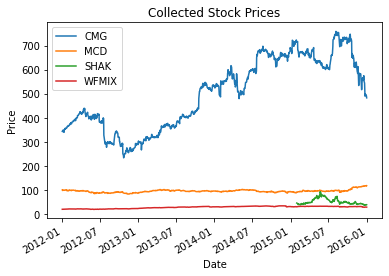

In [279]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

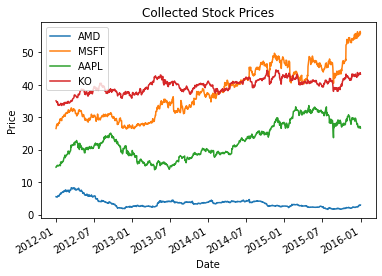

In [280]:
prices2.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date")


The same statistical functions from our interactions with Series resurface here with the addition of the axis parameter. By specifying the axis, we tell pandas to calculate the desired function along either the rows (axis=0) or the columns (axis=1). We can easily calculate the mean of each columns like so:

In [281]:
prices.mean(axis=0)

CMG      501.580328
MCD       96.599871
SHAK      53.755236
WFMIX     29.485646
dtype: float64

In [282]:
#miejemplo
prices2.mean(axis=0)

AMD      3.611113
MSFT    37.857853
AAPL    22.651849
KO      39.696372
dtype: float64

As well as the standard deviation:

In [283]:
prices.std(axis=0)

CMG      146.831560
MCD        5.664326
SHAK      12.125123
WFMIX      4.464749
dtype: float64

In [284]:
#miejemplo
prices2.std(axis=0)

AMD     1.483185
MSFT    7.753007
AAPL    5.376092
KO      2.258173
dtype: float64

Again, the describe() function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [285]:
prices.describe()

,CMG,MCD,SHAK,WFMIX
count,1006.000000,1006.000000,233.000000,1006.000000
mean,501.580328,96.599871,53.755236,29.485646
std,146.831560,5.664326,12.125123,4.464749
min,234.449997,84.169998,38.189999,20.559999
25%,370.607498,93.699997,44.299999,25.045001
50%,521.285004,96.300003,49.450001,31.270000
75%,645.989990,99.027498,61.590000,33.040001
max,758.489990,119.639999,94.389999,35.689999


In [286]:
#miejemplo
prices2.describe()

,AMD,MSFT,AAPL,KO
count,1006.000000,1006.000000,1006.000000,1006.000000
mean,3.611113,37.857853,22.651849,39.696372
std,1.483185,7.753007,5.376092,2.258173
min,1.620000,26.379999,13.856071,33.645000
25%,2.540000,30.692501,18.526607,38.162499
50%,3.480000,37.255001,21.470714,40.080002
75%,4.070000,44.552501,27.566875,41.317500
max,8.310000,56.470001,33.615002,44.580002


We can scale and add scalars to our DataFrame, as you might suspect after dealing with Series. This again works element-wise.

In [287]:
(2 * prices - 50).head(5)

,CMG,MCD,SHAK,WFMIX
Date,,,,
2012-01-03,637.400024,152.660004,NaN,-7.639999
2012-01-04,642.000000,148.220001,NaN,-7.820000
2012-01-05,643.760010,148.940002,NaN,-7.580002
2012-01-06,647.760010,150.179993,NaN,-7.500000
2012-01-09,648.000000,151.759995,NaN,-7.320000


In [288]:
#miejemplo
(5* prices2 + 20).head(5)

,AMD,MSFT,AAPL,KO
Date,,,,
2012-01-03,47.650001,152.749996,93.107147,195.375004
2012-01-04,47.349999,154.099998,93.214283,194.775009
2012-01-05,47.249999,156.899996,94.098215,194.400005
2012-01-06,47.200000,157.650003,94.958930,193.675003
2012-01-09,47.100000,160.249996,95.982146,192.500000


Here we use the pct_change() method to get a DataFrame of the multiplicative returns of the securities that we are looking at.

In [289]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,CMG,MCD,SHAK,WFMIX
Date,,,,
2012-01-04,0.006692,-0.021909,NaN,-0.004249
2012-01-05,0.002543,0.003632,NaN,0.005690
2012-01-06,0.005766,0.006233,NaN,0.001886
2012-01-09,0.000344,0.007893,NaN,0.004235
2012-01-10,-0.014842,-0.006344,NaN,0.009841


In [290]:
#miejemplo
mult_returns2 = prices2.pct_change()[1:]
mult_returns2.head()

,AMD,MSFT,AAPL,KO
Date,,,,
2012-01-04,-0.010850,0.010170,0.001465,-0.003421
2012-01-05,-0.003656,0.020880,0.012073,-0.002146
2012-01-06,-0.001835,0.005479,0.011616,-0.004157
2012-01-09,-0.003676,0.018888,0.013650,-0.006766
2012-01-10,0.044280,-0.004278,0.000964,0.006812



If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

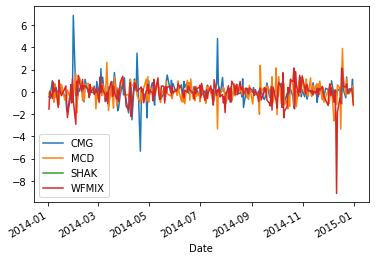

In [291]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

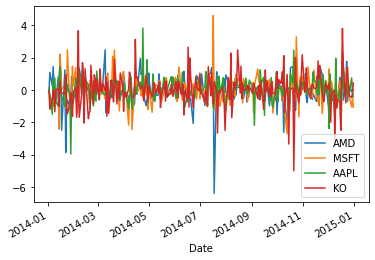

In [293]:
#miejemplo
norm_returns2 = (mult_returns2 - mult_returns2.mean(axis=0))/mult_returns2.std(axis=0)
norm_returns2.loc['2014-01-01':'2015-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with DataFrames.

In [296]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.columns = prices.columns

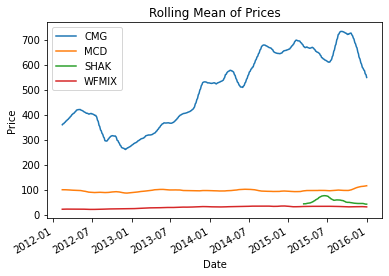

In [298]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [297]:
#miejemplo
rolling_mean2 = prices2.rolling(30).mean()
rolling_mean2.columns = prices2.columns

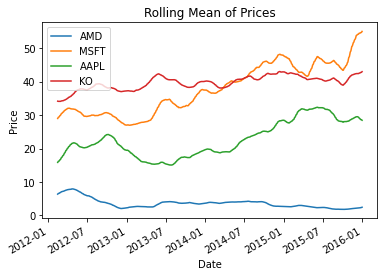

In [299]:
#miejemplo
rolling_mean2.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

For a complete list of all the methods that are built into DataFrames, check out the documentation.

#**Next Steps**
Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the documentation.

This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.